In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt

import urllib

In [ ]:
models = {
          'Resnet101':'https://tfhub.dev/tensorflow/centernet/resnet101v1_fpn_512x512/1',
          'HourGlass104':'https://tfhub.dev/tensorflow/centernet/hourglass_512x512/1'
         }

In [ ]:
# images = [
#           'https://farm7.staticflickr.com/6073/6032446158_85fa667cd2_z.jpg',
#           'https://farm9.staticflickr.com/8538/8678472399_886f8eabec_z.jpg',
#           'https://farm6.staticflickr.com/5485/10028794463_d8cbb38932_z.jpg',
#           'https://farm4.staticflickr.com/3057/2475401198_0a342a907e_z.jpg'
#          ]

In [ ]:
# for i in range(len(images)):
#     urllib.request.urlretrieve(images[i], "img{}.jpg".format(i+1))

In [ ]:
img1 = cv2.imread('000003.jpg')
img2 = cv2.imread('000002.jpg')
img3 = cv2.imread('000032.jpg')
img4 = cv2.imread('000033.jpg')
img5 = cv2.imread('000034.jpg')
img6 = cv2.imread('000035.jpg')
img7 = cv2.imread('000036.jpg')
img8 = cv2.imread('000037.jpg')
img10= cv2.imread('000038.jpg')
img9 = cv2.imread('000039.jpg')

In [ ]:
def plot_images(img_list, title=None, row=1, column=2,
                fig_size=(10, 15)):
    plt.figure(figsize=fig_size)
    for i, img in enumerate(img_list):
        plt.subplot(row, column, i+1)
        plt.imshow(img[...,::-1])
        plt.axis('off')
        plt.title(title[i] if title else 'img{}'.format(i+1))
    plt.show()

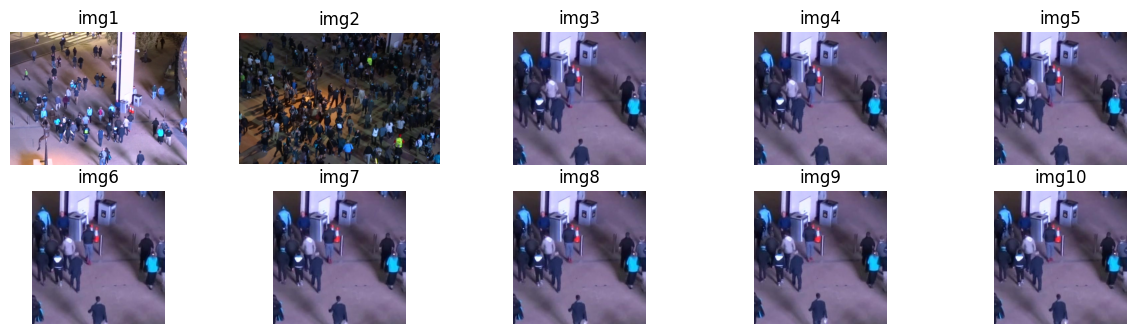

In [ ]:
image_list = [img1, img2, img3, img4, img5, img6, img7, img8, img9, img10]
plot_images(image_list, row=5, column=5, fig_size=(15, 10))


In [ ]:
category_index = {1: 'person', 2: 'bicycle', 3: 'car', 4: 'motorcycle',
                  5: 'airplane', 6: 'bus', 7: 'train', 8: 'truck', 9: 'boat',
                  10: 'traffic light', 11: 'fire hydrant', 13: 'stop sign',
                  14: 'parking meter', 15: 'bench', 16: 'bird', 17: 'cat',
                  18: 'dog', 19: 'horse', 20: 'sheep', 21: 'cow',
                  22: 'elephant', 23: 'bear', 24: 'zebra', 25: 'giraffe',
                  27: 'backpack', 28: 'umbrella', 31: 'handbag', 32: 'tie',
                  33: 'suitcase', 34: 'frisbee', 35: 'skis', 36: 'snowboard',
                  37: 'sports ball', 38: 'kite', 39: 'baseball bat',
                  40: 'baseball glove', 41: 'skateboard', 42: 'surfboard',
                  43: 'tennis racket', 44: 'bottle', 46: 'wine glass',
                  47: 'cup', 48: 'fork', 49: 'knife', 50: 'spoon', 51: 'bowl',
                  52: 'banana',  53: 'apple',  54: 'sandwich',  55: 'orange',
                  56: 'broccoli',  57: 'carrot',  58: 'hot dog',  59: 'pizza',
                  60: 'donut', 61: 'cake', 62: 'chair', 63: 'couch',
                  64: 'potted plant', 65: 'bed', 67: 'dining table',
                  70: 'toilet', 72: 'tv', 73: 'laptop', 74: 'mouse',
                  75: 'remote', 76: 'keyboard', 77: 'cell phone',
                  78: 'microwave', 79: 'oven', 80: 'toaster', 81: 'sink',
                  82: 'refrigerator', 84: 'book', 85: 'clock', 86: 'vase',
                  87: 'scissors', 88: 'teddy bear', 89: 'hair drier',
                  90: 'toothbrush'}

In [ ]:
R = np.array(np.arange(0, 256, 63))
G = np.roll(R, 2)
B = np.roll(R, 4)

COLOR_IDS = np.array(np.meshgrid(R, G, B)).T.reshape(-1, 3)

In [ ]:
# ResNet101.
resnet = hub.load(models['Resnet101'])
# Hourglass104.
hourglass = hub.load(models['HourGlass104'])

In [ ]:
# Hourglass104 inference.
result_hourglass = hourglass(np.array([img1]))

In [ ]:

result_hourglass.keys()

dict_keys(['detection_scores', 'num_detections', 'detection_classes', 'detection_boxes'])

In [ ]:
print('num_detections shape\t:{}'.format(result_hourglass['num_detections'].shape))
print('detection_boxes shape\t:{}'.format(result_hourglass['detection_boxes'].shape))
print('detection_scores shape\t:{}'.format(result_hourglass['detection_scores'].shape))
print('detection_classes shape\t:{}'.format(result_hourglass['detection_classes'].shape))


num_detections shape	:(1,)
detection_boxes shape	:(1, 100, 4)
detection_scores shape	:(1, 100)
detection_classes shape	:(1, 100)


In [ ]:
def to_numpy(prediction):
    result = dict()
    bboxes = prediction['detection_boxes'][0].numpy()
    scores = prediction['detection_scores'][0].numpy()
    # class ids are int
    classes = prediction['detection_classes'][0].numpy().astype(int)
    return bboxes, scores, classes

In [ ]:
print_count = 5
bboxes, scores, classes = to_numpy(result_hourglass)
print('detection_boxes:\n{}'.format(bboxes[:print_count]))
print('detection_scores:\n{}'.format(scores[:print_count]))
print('detection_classes:\n{}'.format(classes[:print_count]))

detection_boxes:
[[0.86895746 0.5363305  0.9988595  0.56598884]
 [0.892094   0.7113997  0.998481   0.7615061 ]
 [0.5610497  0.49251878 0.6831357  0.5308744 ]
 [0.5577141  0.4342322  0.6851214  0.46642283]
 [0.17627822 0.26517656 0.26926607 0.29140744]]
detection_scores:
[0.6341506  0.60082877 0.55356497 0.54003084 0.50369895]
detection_classes:
[1 1 1 1 1]


In [ ]:
def filter_detections_on_score(boxes, scores, classes, score_thresh=0.3):
    ids = np.where(scores >= score_thresh)
    return boxes[ids], scores[ids], classes[ids]

In [ ]:
score_thresh = 0.30
bboxes, scores, classes = filter_detections_on_score(bboxes, scores, classes,
                                                    score_thresh)
print('detection_boxes:\n{}'.format(bboxes))
print('detection_scores:\n{}'.format(scores))
print('detection_classes:\n{}'.format(classes))

detection_boxes:
[[0.86895746 0.5363305  0.9988595  0.56598884]
 [0.892094   0.7113997  0.998481   0.7615061 ]
 [0.5610497  0.49251878 0.6831357  0.5308744 ]
 [0.5577141  0.4342322  0.6851214  0.46642283]
 [0.17627822 0.26517656 0.26926607 0.29140744]
 [0.63137937 0.63689876 0.7812552  0.678501  ]
 [0.9184069  0.55776286 0.9637729  0.57237434]
 [0.7113608  0.8729124  0.86489    0.9182241 ]
 [0.7103669  0.8303516  0.8439001  0.870257  ]
 [0.881061   0.50075865 1.         0.5410769 ]
 [0.32770512 0.40961185 0.44847596 0.4424838 ]
 [0.67966974 0.5394286  0.8160731  0.58110857]
 [0.5752388  0.55146104 0.70861214 0.5933469 ]
 [0.3646679  0.20885107 0.39393687 0.22098404]
 [0.4641382  0.29607466 0.59321237 0.33397344]
 [0.697862   0.59536207 0.8386585  0.6475986 ]
 [0.6162767  0.4086542  0.7231392  0.44606477]
 [0.6435269  0.79903376 0.78766394 0.8438473 ]
 [0.10502317 0.49862096 0.1987167  0.5235901 ]
 [0.67305076 0.33476666 0.8340682  0.3772519 ]
 [0.21812332 0.57054776 0.25018486 0.594375

In [ ]:
def normalize_to_pixels_bboxs(bboxes, img):
    img_height, img_width, _ = img.shape
    bboxes[:, 0] *= img_height
    bboxes[:, 1] *= img_width
    bboxes[:, 2] *= img_height
    bboxes[:, 3] *= img_width
    return bboxes.astype(int)

In [ ]:
bboxes = normalize_to_pixels_bboxs(bboxes, img1)
print('detection_boxes:\n{}'.format(bboxes))

detection_boxes:
[[ 764  629  878  663]
 [ 785  834  878  893]
 [ 493  577  601  622]
 [ 490  509  602  547]
 [ 155  311  236  341]
 [ 555  747  687  795]
 [ 808  654  848  671]
 [ 625 1023  761 1077]
 [ 625  974  742 1020]
 [ 775  587  880  634]
 [ 288  480  394  519]
 [ 598  632  718  681]
 [ 506  646  623  695]
 [ 320  244  346  259]
 [ 408  347  522  391]
 [ 614  698  738  759]
 [ 542  479  636  523]
 [ 566  937  693  989]
 [  92  584  174  614]
 [ 592  392  733  442]
 [ 191  669  220  697]
 [ 239   88  322  137]
 [ 488  153  602  198]
 [ 554  432  659  470]
 [ 299  244  408  284]
 [ 412  298  517  338]
 [ 270  596  373  639]
 [ 270  557  369  600]
 [ 796  586  838  616]
 [ 501  258  607  301]
 [ 620  682  726  717]
 [ 536  776  658  821]
 [ 322  674  417  704]
 [ 366  371  467  407]
 [   2  162   77  191]
 [ 564  178  784  269]
 [ 599  320  730  363]
 [   2   12  880 1169]
 [ 561  291  670  334]
 [ 334    3  427   39]
 [ 295  442  387  478]
 [ 354  979  458 1027]
 [ 796  586  838 

In [ ]:
def add_prediction_to_image(img, bboxes, scores, classes, id_class_map=category_index, colors=COLOR_IDS):
    img_with_bbox = img.copy()
    for box, score, cls in zip(bboxes, scores, classes):
        top, left, bottom, right = box
        class_name = id_class_map[cls]

        # Bounding box annotations.
        color = tuple(colors[cls % len(COLOR_IDS)].tolist())[::-1]
        img_with_bbox = cv2.rectangle(img_with_bbox, (left, top), (right, bottom), color, thickness=2)
        display_txt = '{}: {:.2f}'.format(class_name, score)
        ((text_width, text_height), _) = cv2.getTextSize(display_txt, cv2.FONT_HERSHEY_SIMPLEX, 1.0, 2)
        img_with_bbox = cv2.rectangle(img_with_bbox, (left, top - int(0.9 * text_height)), (left + int(0.4*text_width), top), color, thickness=-1)
        img_with_bbox = cv2.putText(img_with_bbox, display_txt, (left, top - int(0.3 * text_height)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 0, 0), 1)

    return img_with_bbox

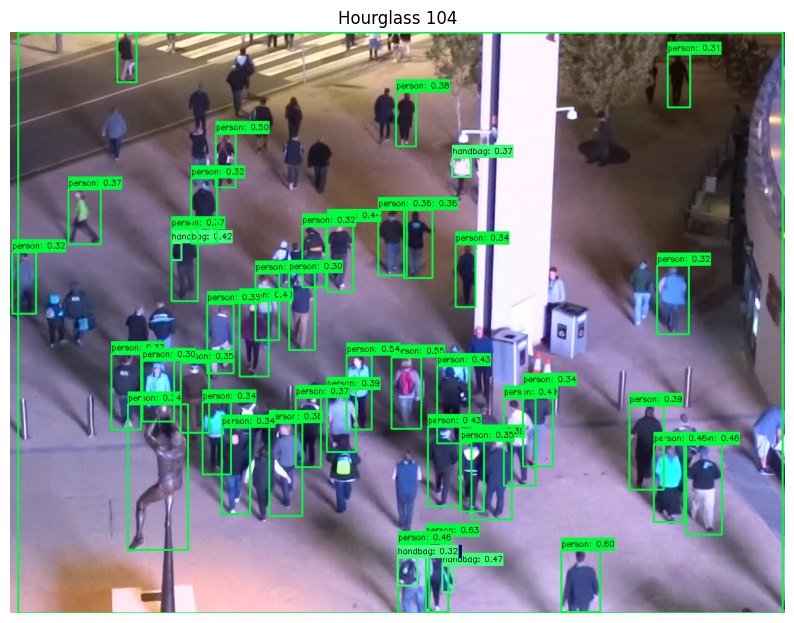

In [ ]:
annotated_img = add_prediction_to_image(img1, bboxes, scores, classes)
plot_images([annotated_img], ['Hourglass 104'],row=1, column=1, fig_size=(10, 10))


In [ ]:
def infer_and_add_prediction_to_image(img, model, score_thresh=0.1):
    prediction = model(np.array([img]))
    bboxes, scores, classes = to_numpy(prediction)

    bboxes, scores, classes = filter_detections_on_score(bboxes, scores, classes,
                                                        score_thresh)
    boxes = normalize_to_pixels_bboxs(bboxes, img)
    img_with_bboxes = add_prediction_to_image(img, boxes, scores, classes)
    return img_with_bboxes

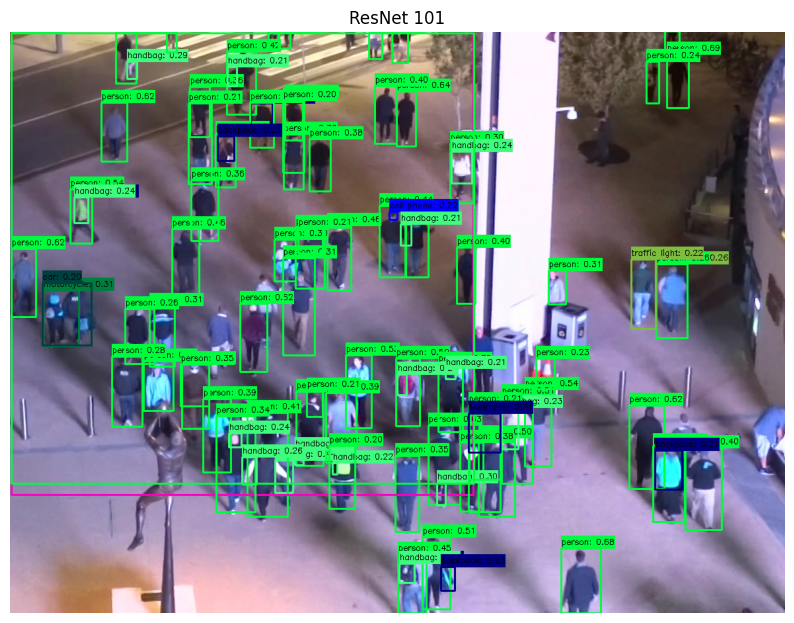

In [ ]:
annotated_img = infer_and_add_prediction_to_image(img1, resnet)
plot_images([annotated_img], ['ResNet 101'], row=1, column=1, fig_size=(10, 10))


In [ ]:
def show_hourglass_resnet_inference(img, score_thresh=0.1):
    hourglass_infer = infer_and_add_prediction_to_image(img, hourglass)
    resnet_infer = infer_and_add_prediction_to_image(img, resnet)
    image_list = [hourglass_infer, resnet_infer]
    titles = ['Hourglass 104', 'ResNet 101']
    plot_images(image_list, titles, row=1, column=2, fig_size=(20, 10))


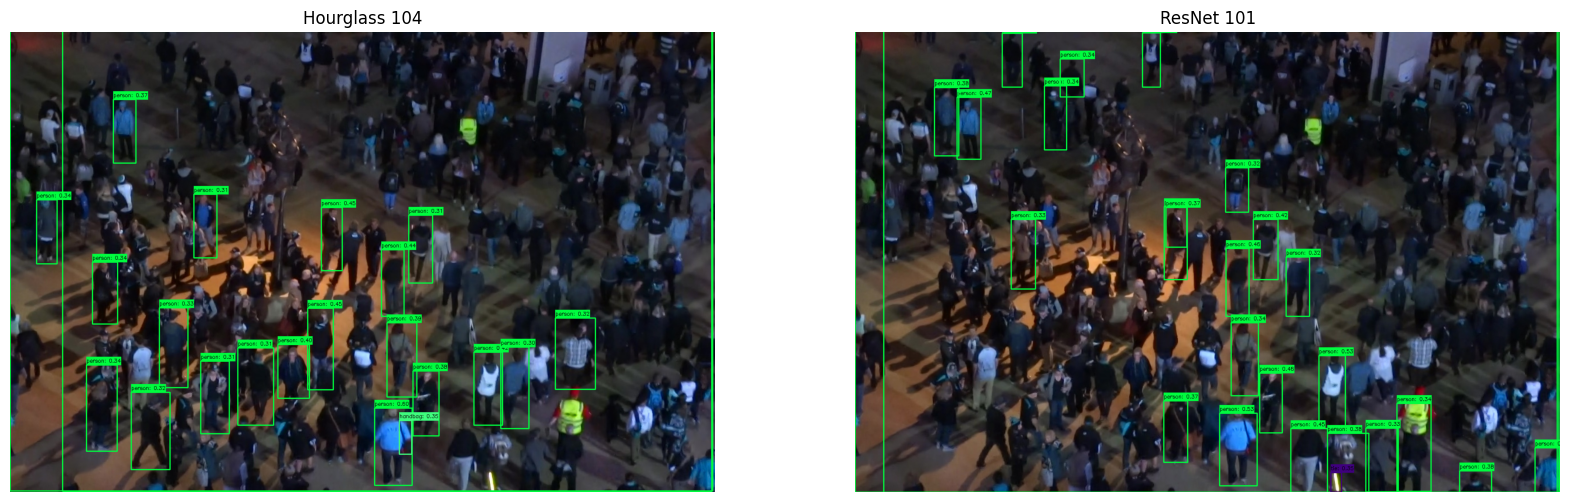

In [ ]:
show_hourglass_resnet_inference(img2)

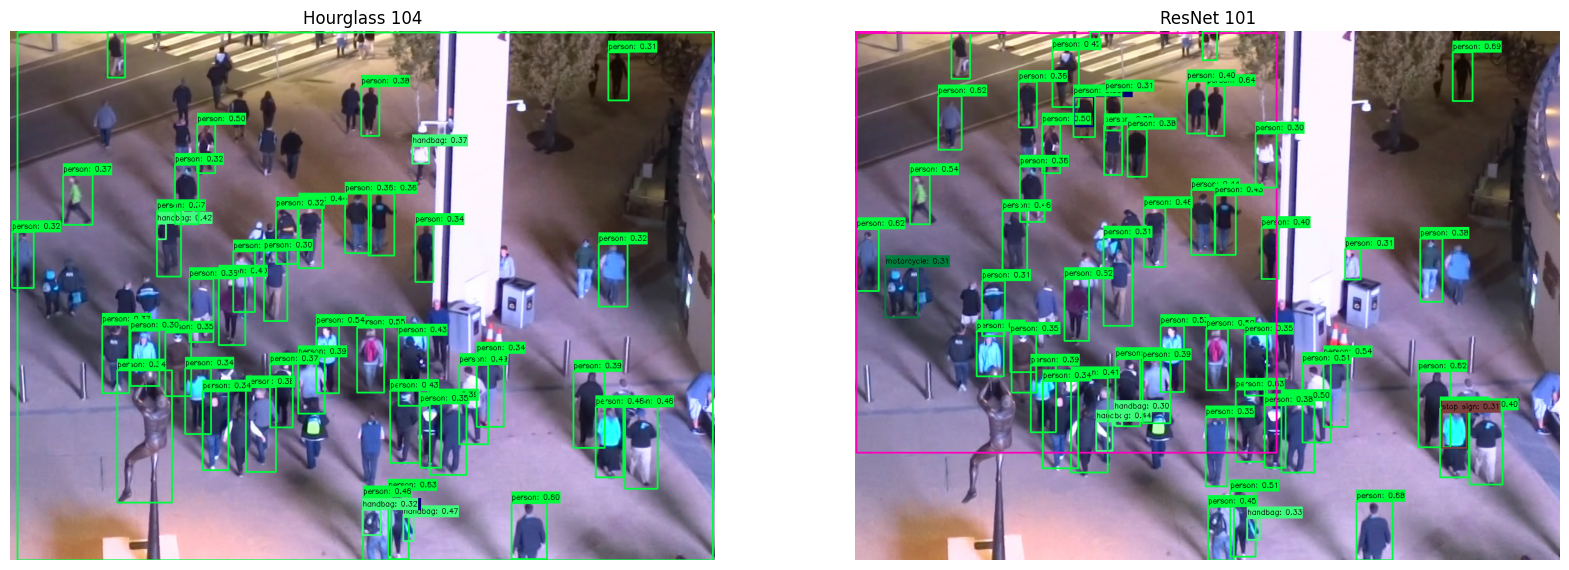

In [ ]:
show_hourglass_resnet_inference(img1)